In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
#타이타닉 데이터 가져오기
titanic = sns.load_dataset('titanic')

In [4]:
#데이터 확인
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
#수치정보의 분포 확인
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#누락값 전부 빼고 호출 = 182개
titanic.dropna().describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [7]:
titanic.var() #분포

C:\Users\JEONGH~1\AppData\Local\Temp/ipykernel_7568/3881755987.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic.var()


survived         0.236772
pclass           0.699015
age            211.019125
sibsp            1.216043
parch            0.649728
fare          2469.436846
adult_male       0.239723
alone            0.239723
dtype: float64

In [8]:
titanic.mad() #mean absolute diviation

survived       0.473013
pclass         0.761968
age           11.322944
sibsp          0.713780
parch          0.580742
fare          28.163692
adult_male     0.478908
alone          0.478908
dtype: float64

In [9]:
titanic.groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


<AxesSubplot:xlabel='count', ylabel='class'>

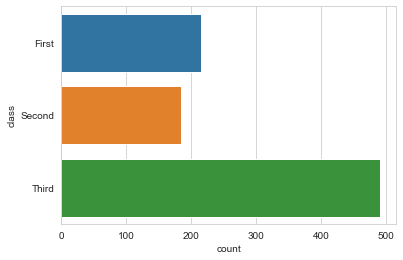

In [11]:
sns.countplot(y= 'class', data=titanic)

<AxesSubplot:xlabel='count', ylabel='sex'>

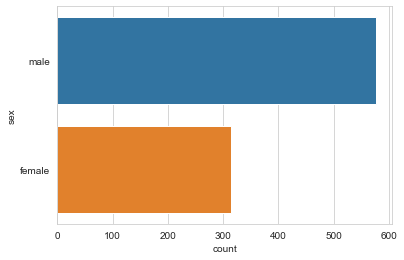

In [13]:
sns.countplot(y = 'sex', data=titanic)

<AxesSubplot:xlabel='count', ylabel='alive'>

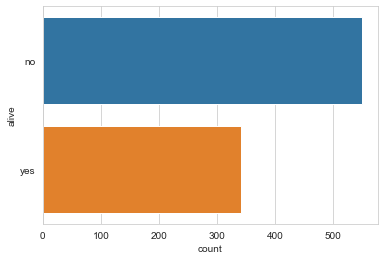

In [14]:
sns.countplot(y='alive', data=titanic)

<AxesSubplot:xlabel='count', ylabel='alone'>

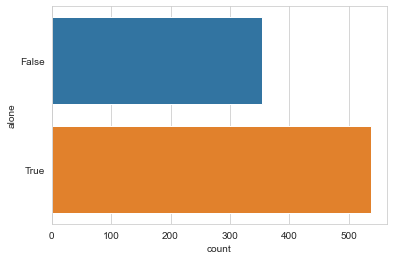

In [15]:
sns.countplot(y='alone', data=titanic)

In [16]:
titanic.groupby('class').std()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.484026,0.0,14.802856,0.611898,0.693997,78.380373,0.498555,0.501140
Second,0.500623,0.0,14.001077,0.601633,0.690963,13.417399,0.499911,0.497081
Third,0.428949,0.0,12.495398,1.374883,0.888861,11.778142,0.477552,0.474233


In [18]:
titanic.groupby('class')['fare'].median()

class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64

In [23]:
titanic.query("alive == 'yes'")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [24]:
titanic.query("alive == 'yes'").groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,136,136,136,122,136,136,136,134,136,136,117,134,136,136
Second,87,87,87,83,87,87,87,87,87,87,13,87,87,87
Third,119,119,119,85,119,119,119,119,119,119,6,119,119,119


In [26]:
titanic.groupby('class')['age'].describe() #최고령자는 80

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
First,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
Second,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
Third,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [29]:
titanic.query("alive == 'yes'").groupby('class').describe()

survived                                    pclass       ... parch  \
          count mean  std  min  25%  50%  75%  max  count mean  ...   75%   
class                                                           ...         
First     136.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  136.0  1.0  ...   1.0   
Second     87.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   87.0  2.0  ...   1.0   
Third     119.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  119.0  3.0  ...   1.0   

              fare                                                    \
        max  count       mean        std      min       25%      50%   
class                                                                  
First   2.0  136.0  95.608029  85.286820  25.9292  50.98545  77.9583   
Second  3.0   87.0  22.055700  10.853502  10.5000  13.00000  21.0000   
Third   5.0  119.0  13.694887  10.692993   0.0000   7.77500   8.5167   

                              
               75%       max  
class                         
First   111.481225  512.3292  
Second   26.250000   65.0000  
Third    15.875000   56.4958  

[3 rows x 48 columns]

In [30]:
titanic.groupby('sex')['age'].aggregate([min, np.median, max])

,min,median,max
sex,,,
female,0.75,27.0,63.0
male,0.42,29.0,80.0


In [32]:
titanic.query('age > 30').groupby('class').median()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,1.0,1.0,45.0,0.0,0.0,56.9292,1.0,0.0
Second,0.0,2.0,39.0,0.0,0.0,14.0000,1.0,1.0
Third,0.0,3.0,38.0,0.0,0.0,8.0500,1.0,1.0


In [33]:
titanic.query('fare < 20').groupby('class').median()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.0,1.0,38.5,0.0,0.0,0.0000,1.0,1.0
Second,0.0,2.0,30.0,0.0,0.0,13.0000,1.0,1.0
Third,0.0,3.0,25.0,0.0,0.0,7.8958,1.0,1.0


In [34]:
titanic.groupby(['class', 'sex'])['age'].mean().unstack()

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


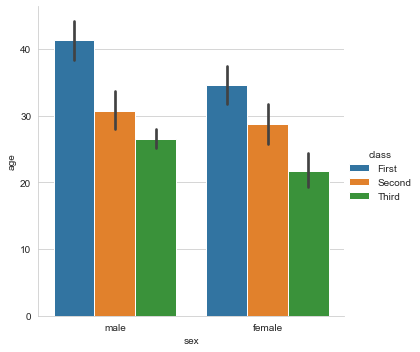

In [35]:
sns.catplot(x = 'sex', y='age',
           hue = 'class', kind='bar',
           data = titanic)

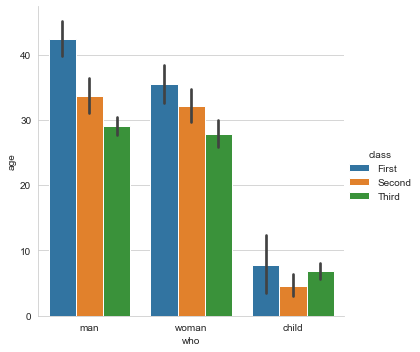

In [36]:
sns.catplot(x = 'who', y='age',
           hue = 'class', kind='bar',
           data = titanic)

In [38]:
titanic.groupby(['class', 'sex'])['fare'].mean().unstack()

sex,female,male
class,,
First,106.125798,67.226127
Second,21.970121,19.741782
Third,16.118810,12.661633


In [39]:
titanic.groupby(['class', 'who'])['fare'].mean().unstack()

who,child,man,woman
class,,,
First,139.382633,65.951086,104.317995
Second,28.323905,19.054124,20.868624
Third,23.220190,11.340213,15.354351


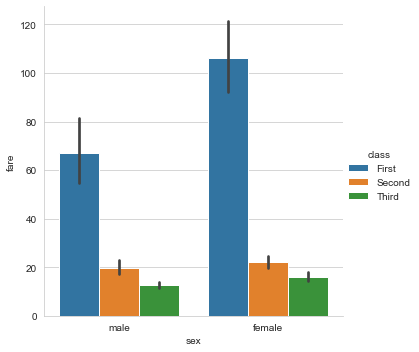

In [41]:
sns.catplot(x = 'sex', y = 'fare',
           hue = 'class', kind='bar',
           data = titanic)

# 여성의 운임비용이 높음

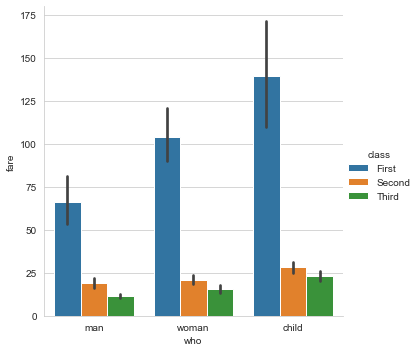

In [42]:
sns.catplot(x = 'who', y = 'fare',
           hue = 'class', kind='bar',
           data = titanic)

# 아이, 여성의 운임비용이 높음

In [44]:
titanic.groupby(['class', 'sex'])['survived'].mean().unstack()

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [45]:
titanic.pivot_table('survived', index='class', columns='who')
#2등급 아이들은 전원 생존
#3등급은 생존확률 감소

who,child,man,woman
class,,,
First,0.833333,0.352941,0.978022
Second,1.000000,0.080808,0.909091
Third,0.431034,0.119122,0.491228


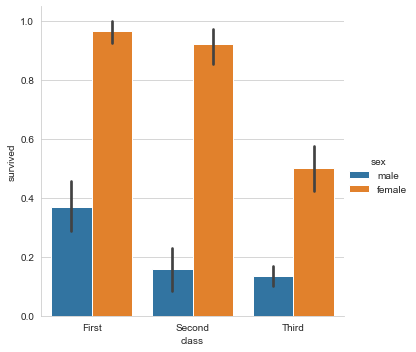

In [47]:
sns.catplot(x = 'class', y = 'survived',
           hue='sex', kind='bar',
           data = titanic)

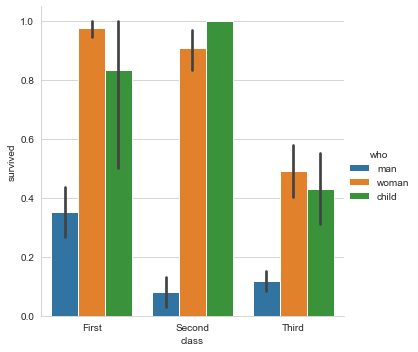

In [48]:
sns.catplot(x = 'class', y = 'survived',
           hue='who', kind='bar',
           data = titanic)

In [51]:
age = pd.cut(titanic['age'], [0, 18, 40, 80])
titanic.pivot_table('survived', ['who', age], 'class')

class              First    Second     Third
who   age                                   
child (0, 18]   0.833333  1.000000  0.431034
man   (0, 18]   0.500000  0.000000  0.086957
      (18, 40]  0.478261  0.063492  0.146199
      (40, 80]  0.280000  0.095238  0.064516
woman (0, 18]   1.000000  1.000000  0.461538
      (18, 40]  0.979167  0.914894  0.480000
      (40, 80]  0.961538  0.846154  0.111111

In [53]:
fare = pd.qcut(titanic['fare'], 3)
titanic.pivot_table('survived', ['who', age], [fare, 'class'])

fare           (-0.001, 8.662]           (8.662, 26.0]                      \
class                    First     Third         First    Second     Third   
who   age                                                                    
child (0, 18]              NaN  0.666667           NaN  1.000000  0.703704   
man   (0, 18]              NaN  0.125000           NaN  0.000000  0.000000   
      (18, 40]             0.0  0.138462           NaN  0.078431  0.114286   
      (40, 80]             NaN  0.074074           0.0  0.111111  0.000000   
woman (0, 18]              NaN  0.666667           NaN  1.000000  0.333333   
      (18, 40]             NaN  0.550000           NaN  0.894737  0.461538   
      (40, 80]             NaN  0.000000           1.0  0.818182  0.250000   

fare           (26.0, 512.329]               
class                    First Second Third  
who   age                                    
child (0, 18]         0.833333    1.0  0.08  
man   (0, 18]         0.500000    0.0  0.00  
      (18, 40]        0.523810    0.0  0.50  
      (40, 80]        0.291667    0.0   NaN  
woman (0, 18]         1.000000    NaN  0.00  
      (18, 40]        0.979167    1.0  0.25  
      (40, 80]        0.958333    1.0  0.00

In [54]:
titanic.pivot_table('survived', index='who', columns='class', margins=True)

class,First,Second,Third,All
who,,,,
child,0.833333,1.000000,0.431034,0.590361
man,0.352941,0.080808,0.119122,0.163873
woman,0.978022,0.909091,0.491228,0.756458
All,0.629630,0.472826,0.242363,0.383838


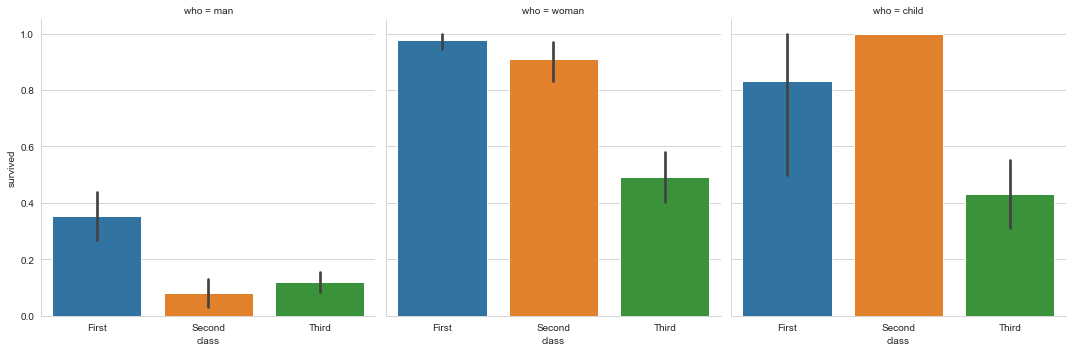

In [55]:
sns.catplot(x = 'class', y = 'survived',
           col='who', kind='bar',
           data = titanic);

In [56]:
titanic.pivot_table('survived', index='deck', columns='class', margins=True)

class,First,Second,Third,All
deck,,,,
A,0.466667,NaN,NaN,0.466667
B,0.744681,NaN,NaN,0.744681
C,0.593220,NaN,NaN,0.593220
D,0.758621,0.7500,NaN,0.757576
E,0.720000,0.7500,1.0,0.750000
F,NaN,0.8750,0.2,0.615385
G,NaN,NaN,0.5,0.500000
All,0.668571,0.8125,0.5,0.669951


<AxesSubplot:xlabel='count', ylabel='deck'>

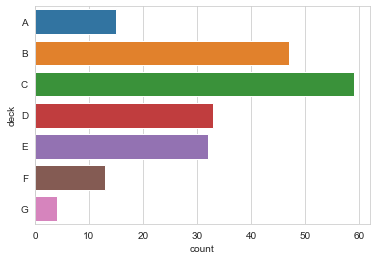

In [60]:
sns.countplot(y='deck', data=titanic)

<AxesSubplot:xlabel='count', ylabel='deck'>

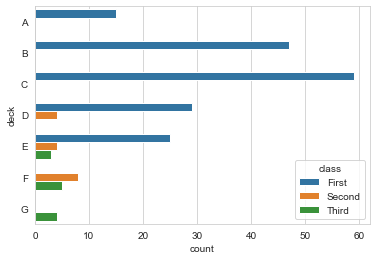

In [61]:
sns.countplot(y='deck', data=titanic,
             hue='class')

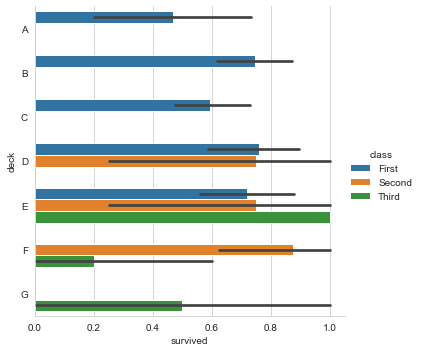

In [62]:
sns.catplot(x = 'survived', y = 'deck',
           hue='class', kind='bar',
           data=titanic)


In [63]:
titanic.pivot_table('survived', index='embark_town', columns='class', margins=True)

class,First,Second,Third,All
embark_town,,,,
Cherbourg,0.694118,0.529412,0.378788,0.553571
Queenstown,0.500000,0.666667,0.375000,0.389610
Southampton,0.582677,0.463415,0.189802,0.336957
All,0.626168,0.472826,0.242363,0.382452


<AxesSubplot:xlabel='count', ylabel='embark_town'>

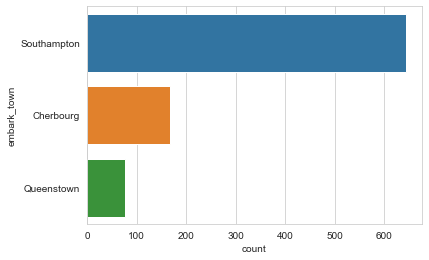

In [64]:
sns.countplot(y='embark_town', data=titanic)

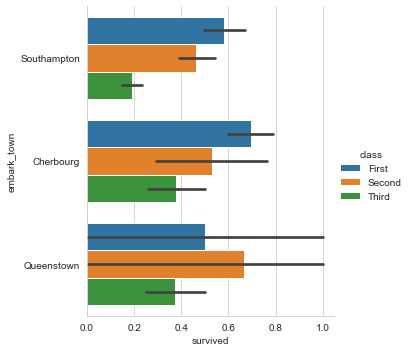

In [66]:
sns.catplot(y = 'embark_town', x = 'survived',
           hue='class', kind='bar',
           data=titanic)

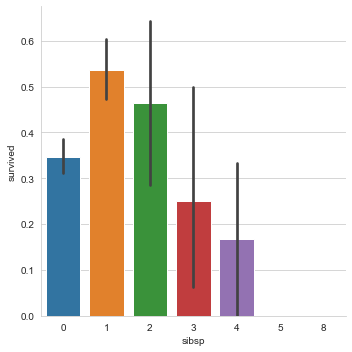

In [70]:
sns.catplot(x = 'sibsp', y = 'survived',
           kind='bar',
           data = titanic)

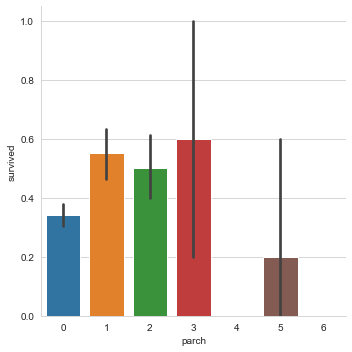

In [71]:
sns.catplot(x = 'parch', y = 'survived',
           kind='bar',
           data = titanic)

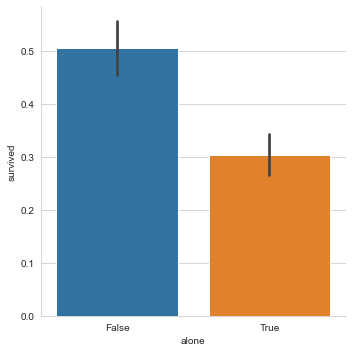

In [72]:
sns.catplot(x = 'alone', y = 'survived',
           kind='bar',
           data = titanic)

#2명 이상 있는 경우가 생존을 많이 함